# Settings

Load Django setup:

In [1]:
import os, sys
PWD = "/code/"
sys.path.insert(0, PWD)
os.environ.setdefault("DJANGO_SETTINGS_MODULE", "local_settings.py")
import django
django.setup()

Seaborn settings:

In [2]:
import seaborn as sns
from matplotlib import pyplot, ticker
from matplotlib.patches import Rectangle
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

a4_dims = (8.27, 11.7)
sns.set(font_scale=1,
        color_codes=False,
        style="whitegrid",
        rc={"lines.linewidth": .5},
        palette=sns.color_palette("Set1", n_colors=9, desat=0.8),
        context="paper")

Import Models:

In [3]:
from results.models import Taxon, PipelineRun, Sample

In [4]:
!docker run hello-world

Unable to find image 'hello-world:latest' locally
latest: Pulling from library/hello-world

0d010525: Pull complete  977B/977BBDigest: sha256:41a65640635299bab090f783209c1e3a3f11934cf7756b09cb2f1e02147c6ed8
Status: Downloaded newer image for hello-world:latest

Hello from Docker!
This message shows that your installation appears to be working correctly.

To generate this message, Docker took the following steps:
 1. The Docker client contacted the Docker daemon.
 2. The Docker daemon pulled the "hello-world" image from the Docker Hub.
    (amd64)
 3. The Docker daemon created a new container from that image which runs the
    executable that produces the output you are currently reading.
 4. The Docker daemon streamed that output to the Docker client, which sent it
    to your terminal.

To try something more ambitious, you can run an Ubuntu container with:
 $ docker run -it ubuntu bash

Share images, automate workflows, and more with a free Docker ID:
 https://hub.docker.com/

For mor

Load R to kernel:

In [4]:
%reload_ext rpy2.ipython

Python Imports:

In [5]:
import pandas as pd
from functools import reduce
pd.set_option('display.width', 250)

# Example

In [8]:
run = PipelineRun.objects.get(analysis_en="test_wgs")
samples = Sample.objects.filter(run_id=run)

In [7]:
def get_abundance_table(samples, rank):
    taxon_dataframes = []
    for sample in samples:
        tax = Taxon.objects.filter(rank=rank, sample_id=sample).values('name', 'abundance')
        tax_df = pd.DataFrame.from_records(tax)
        tax_df = tax_df.set_index(["name"])
        tax_df.columns = [sample.name]
        #print(tax_df)
        taxon_dataframes.append(pd.DataFrame(tax_df))
        
    df = reduce(lambda left, right: left.merge(right, on="name", how="outer"), taxon_dataframes)
    df = df.fillna(0).astype(int) # remove NAs and convert to int
    df = df[(df.T != 0).any()]  # drop rows with only zeros
    
    return df

In [9]:
def get_abundance_table_bacteria(samples, rank):
    taxon_dataframes = []
    for sample in samples:
        bacteria = Taxon.objects.get(name="Bacteria", sample_id=sample)
        tax = Taxon.get_descendants(bacteria).filter(rank=rank, sample_id=sample).values('name', 'abundance')
        tax_df = pd.DataFrame.from_records(tax)
        tax_df = tax_df.set_index(["name"])
        tax_df.columns = [sample.name]
        #print(tax_df)
        taxon_dataframes.append(pd.DataFrame(tax_df))
        
    df = reduce(lambda left, right: left.merge(right, on="name", how="outer"), taxon_dataframes)
    df = df.fillna(0).astype(int) # remove NAs and convert to int
    df = df[(df.T != 0).any()]  # drop rows with only zeros
    
    return df

In [10]:
abundance_table_bact = get_abundance_table_bacteria(samples, "P")
abundance_table = get_abundance_table(samples, "P")

In [11]:
abundance_table

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>sample1</th>
      <th>sample2</th>
    </tr>
    <tr>
      <th>name</th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>Euryarchaeota</th>
      <td>19</td>
      <td>12</td>
    </tr>
    <tr>
      <th>Acidobacteria</th>
      <td>7</td>
      <td>14</td>
    </tr>
    <tr>
      <th>Bacteroidetes</th>
      <td>260</td>
      <td>462</td>
    </tr>
    <tr>
      <th>Gemmatimonadetes</th>
      <td>5</td>
      <td>0</td>
    </tr>
    <tr>
      <th>Fusobacteria</th>
      <td>0</td>
      <td>5</td>
    </tr>
    <tr>
      <th>Verrucomicrobia</th>
      <td>0</td>
      <td>7</td>
    </tr>
    <tr>
      <th>Proteobacteria</th>
      <td>4025</td>
      <td>2842</td>
    </tr>
    <tr>
      <th>Spirochaetes</th>
      <td>0</td>
      <td>8</td>
    </tr>
    <tr>
      <th>Actinobacteria</th>
      <td>2817</td>
      <td>1894</td>
    </tr>
    <tr>
      <th>Cyanobacteria</th>
      <td>16</td>
      <td>72</td>
    </tr>
    <tr>
      <th>Deinococcus-Thermus</th>
      <td>49</td>
      <td>44</td>
    </tr>
    <tr>
      <th>Firmicutes</th>
      <td>1146</td>
      <td>433</td>
    </tr>
    <tr>
      <th>Planctomycetes</th>
      <td>0</td>
      <td>8</td>
    </tr>
  </tbody>
</table>
</div>

In [12]:
abundance_table_P = get_abundance_table(samples, "P")
abundance_table_C = get_abundance_table(samples, "C")

In [13]:
print(abundance_table_P)

                     sample1  sample2
name                                 
Euryarchaeota             19       12
Acidobacteria              7       14
Bacteroidetes            260      462
Gemmatimonadetes           5        0
Fusobacteria               0        5
Verrucomicrobia            0        7
Proteobacteria          4025     2842
Spirochaetes               0        8
Actinobacteria          2817     1894
Cyanobacteria             16       72
Deinococcus-Thermus       49       44
Firmicutes              1146      433
Planctomycetes             0        8


R cell (figure size 5x10 200 dpi) : 

R[write to console]: also installing the dependencies ‘glue’, ‘magrittr’, ‘stringi’, ‘colorspace’, ‘assertthat’, ‘utf8’, ‘Rcpp’, ‘stringr’, ‘labeling’, ‘munsell’, ‘R6’, ‘RColorBrewer’, ‘cli’, ‘crayon’, ‘fansi’, ‘pillar’, ‘pkgconfig’, ‘digest’, ‘gtable’, ‘lazyeval’, ‘plyr’, ‘reshape2’, ‘rlang’, ‘scales’, ‘tibble’, ‘viridisLite’, ‘withr’




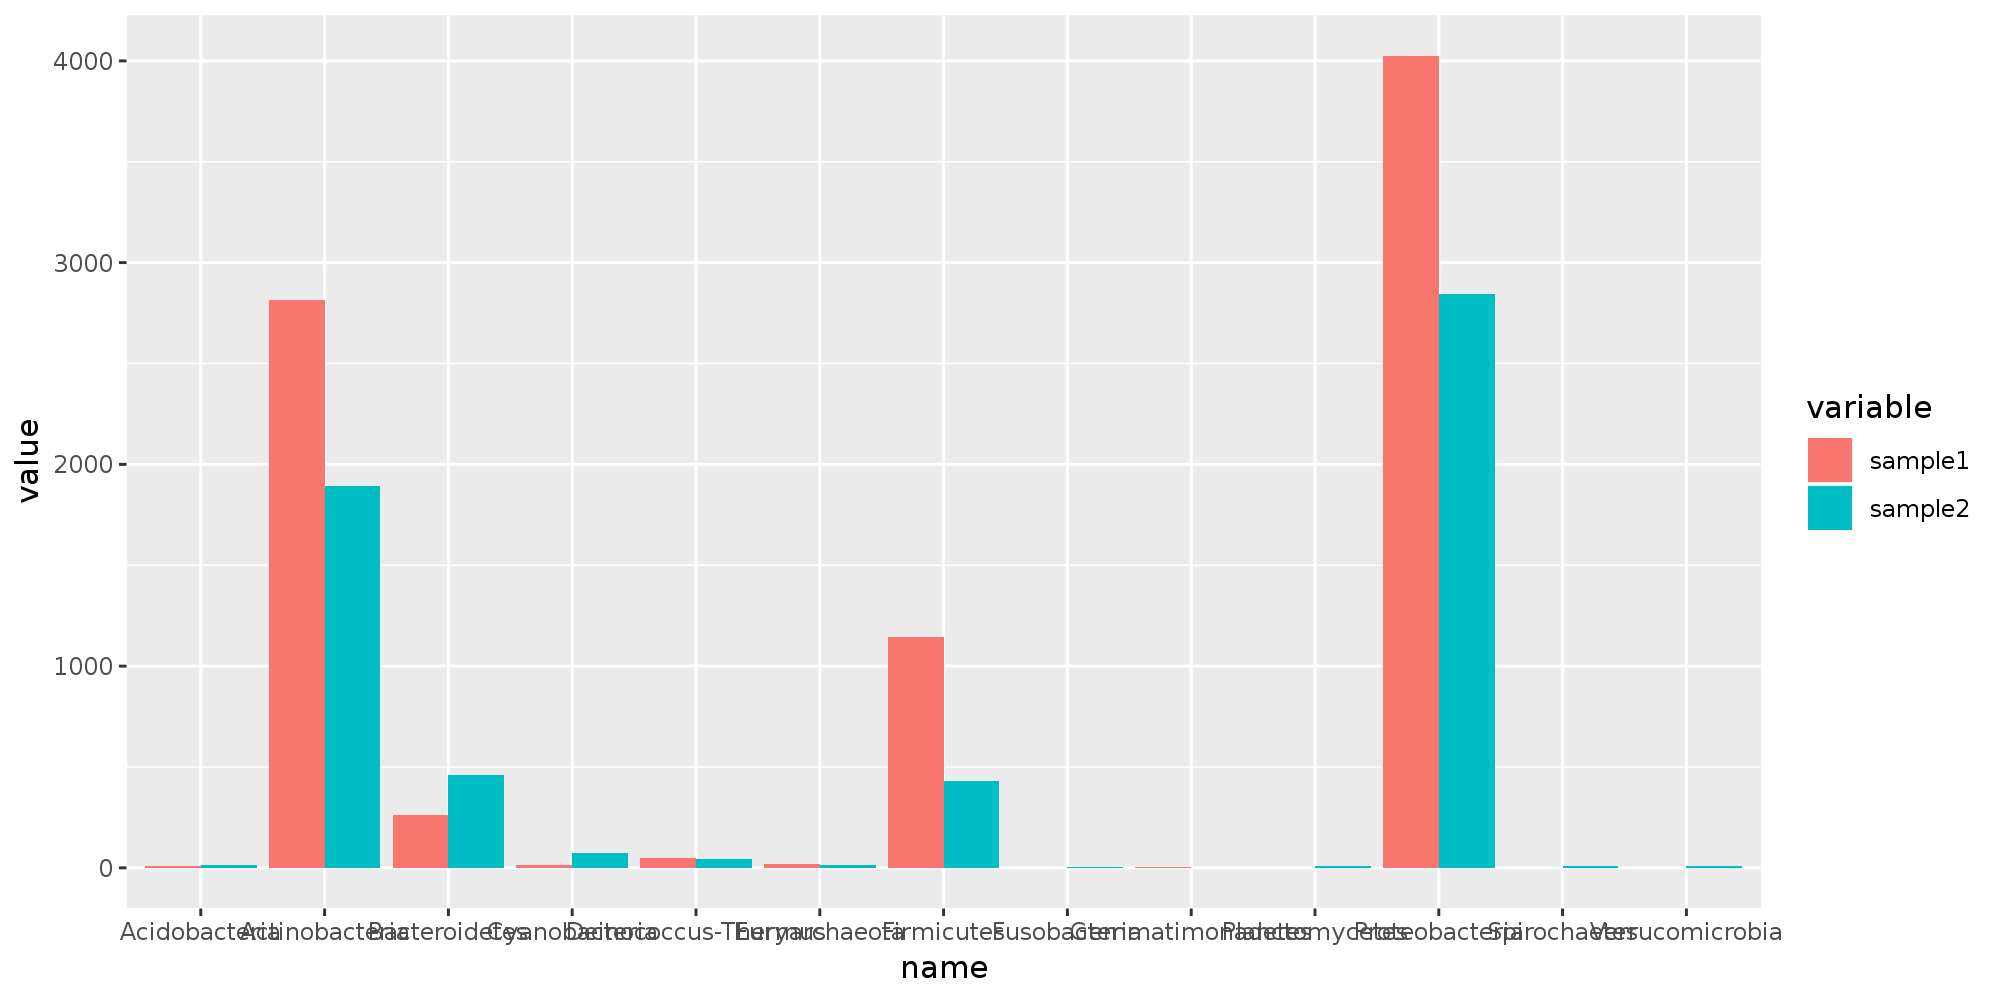

In [34]:
%%R -i abundance_table_P -w 10 -h 5 --units in -r 200
install.packages("ggplot2", repos='http://cran.us.r-project.org', quiet=TRUE)
library(ggplot2)
library(reshape2)
abundance_table <- cbind(name = rownames(abundance_table_P), abundance_table_P)
rownames(abundance_table) <- 1:nrow(abundance_table_P) # index as 1st column
ab_melt = melt(abundance_table, id.vars="name") # melt dataframe to long format
ggplot(ab_melt, aes(name, value)) + geom_bar(stat="identity",aes(fill=variable), position="dodge")

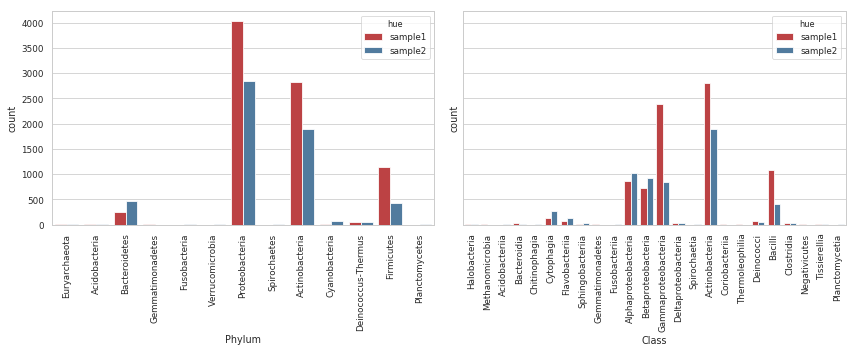

In [62]:
fig, ((ax1, ax2)) = pyplot.subplots(nrows=1, ncols=2,figsize= (12,5),sharey=True)
abundance_table_P_stacked = abundance_table_P.stack().reset_index() 
abundance_table_C_stacked = abundance_table_C.stack().reset_index()
abundance_table_C_stacked.columns = ["x", "hue", "y"]
abundance_table_P_stacked.columns = ["x", "hue", "y"]
#print(abundance_table_C_stacked)
g1 = sns.barplot(x="x", y="y", hue="hue", data=abundance_table_P_stacked, ax=ax1)
g2 = sns.barplot(x="x", y="y", hue="hue", data=abundance_table_C_stacked, ax=ax2)
ax1.set(xlabel="Phylum")
ax2.set(xlabel="Class")
ax1.set(ylabel="count")
ax2.set(ylabel="count")
[item.set_rotation(90) for item in ax2.get_xticklabels()]
[item.set_rotation(90) for item in ax1.get_xticklabels()]
pyplot.close(2)
pyplot.close(3)
fig.tight_layout()
pyplot.show()